In [16]:
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt
import hypernetx.algorithms.hypergraph_modularity as hmod

In [2]:
edges = pd.read_csv('edges.csv')

In [3]:
author = 'author' #id
parent_author = 'parent_author' #id padre del commento

In [4]:
col_name = 'node_col'
df_new = pd.DataFrame()
index = 0

# Iterazione sulle righe del DataFrame sulla colonna 'A'
for i,row in edges.iterrows():
    valore_colonna_A = row[parent_author]
    valore_colonna_B = row[author]
    
    df_new.loc[index, col_name] = valore_colonna_A
    index = index+1
    df_new.loc[(index), col_name] = valore_colonna_B
    index = index+1


In [5]:
# CREAZIONE COLONNA LABEL (edge tra due nodi)

stringa = "e"
count = 0
i = 1

for indice in range(0,len(df_new)):
    my_string = stringa + str(i)
    df_new.loc[indice, 'label'] = my_string

    count = count + 1
    
    if (count >= 2):
        count = 0
        i = i+1

In [6]:
H = hnx.Hypergraph(df_new,edge_col="label",node_col="node_col")

In [26]:
# numero nodi e iperarchi
H.shape

(13170, 49885)

In [15]:
H.is_connected()

# a hypergraph H is connected if every pair of vertices v,w ∈ V is connected in H

False

### Stampo le dimensioni degli iperarchi

In [16]:
hyperedge_sizes = [H.size(hyperedge) for hyperedge in H.edges()]
size_counts = {}
for size in hyperedge_sizes:
    size_counts[size] = size_counts.get(size, 0) + 1

sorted_sizes = sorted(size_counts.items(), key=lambda x: x[0], reverse=True)
for size, count in sorted_sizes:
    print(f"Dimensione dell'iperarco = {size};  {count} iperarchi con questa dimensione")


Dimensione dell'iperarco = 2;  48096 iperarchi con questa dimensione
Dimensione dell'iperarco = 1;  1789 iperarchi con questa dimensione


In [17]:
num_nodes = len(list(H.nodes()))
num_hyperedges = len(list(H.edges()))
connectivity = num_hyperedges / num_nodes
connectivity

3.787775246772969

### Rappresentazione grafica di alcuni iperarchi

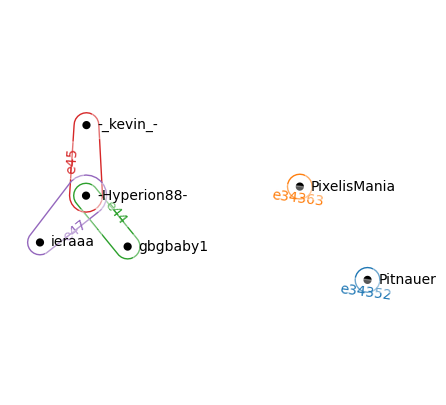

In [12]:
plt.subplots(figsize=(5,5))
hnx.draw(H.restrict_to_edges(['e44','e45', 'e47', 'e34363','e34352']))

## Modularity 
### Given hypergraph HG and a partition A of its vertices, hypergraph modularity is a measure of the quality of this partition.
In order to make the computation of hypergraph modularity more efficient, some quantities need to be pre-computed. We pre-compute quantities such as node strength (weighted degree), d-weights (total weight for each edge cardinality) and binomial coefficients.

In [17]:
HG = hmod.precompute_attributes(H)

Cluster hypergraph with Kumar's algorithm

In [18]:
K = hmod.kumar(HG)

In [19]:
def linear(d, c):
    if c>d/2:
        return c / d
    else: 
        return 0

In [20]:
q = hmod.modularity(HG, K, wdc=linear)

print('modularity score = ', q)

modularity score =  0.5082523018559473
